# Univariate Linear Regression Model 

Coefficients: 
 [[1.30207143]]
Mean squared error: 96.46
Coefficient of determination: 0.64


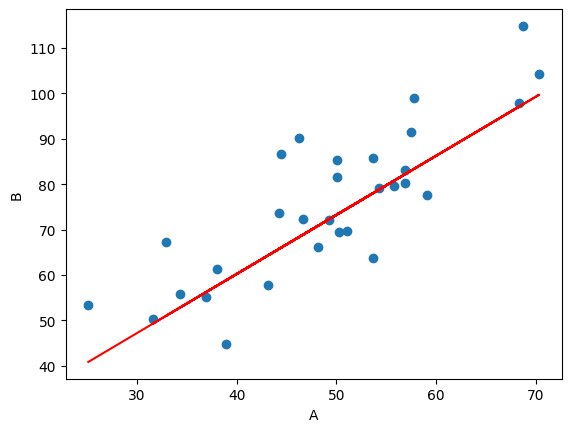

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score

#Reading data from the csv file

data = pd.read_csv("lrdata.csv")
data.head()

data.rename(columns = {'32.502345269453031':'A', '31.70700584656992':'B'}, inplace = True)


#Converting Pandas DataFrame to Numpy Array

data_x = data.A.to_numpy()
data_y = data.B.to_numpy()

#Spliting data into training and test sets

train_data_x = np.transpose(np.atleast_2d(data_x[:-30]))
test_data_x = np.transpose(np.atleast_2d(data_x[-30:]))

train_data_y = np.transpose(np.atleast_2d(data_y[:-30]))
test_data_y = np.transpose(np.atleast_2d(data_y[-30:]))


#Creating a linear regression object

regr = linear_model.LinearRegression()

#Training the model 

regr.fit(train_data_x, train_data_y)

#Making Predictions on the test dataset

predictions = regr.predict(test_data_x)

#Estimated coefficients for the linear regression problem

print('Coefficients: \n', regr.coef_)


#Calculating the mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(test_data_y, predictions))

#Coefficient of determination / $R^{2}$ error
# 
# The best possible score is 1, which is obtained when the predicted values are the same as the actual values.
# A constant model that always predicts the expected value of y, disregarding the input features, would get a score of 0.0. It can be negative in case the model is arbitrarily worse.

print('Coefficient of determination: %.2f'
      % r2_score(test_data_y, predictions))


#Visualizing the fit

plt.scatter(test_data_x, test_data_y)
plt.plot(test_data_x, predictions, color='red')
plt.xlabel("A")
plt.ylabel("B")
plt.show()

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('loan_pred.csv')
print(data.shape)
data.head()

#drop all rows with missing values
data.dropna(inplace=True)


#import the library LabelEncoder
from sklearn.preprocessing import LabelEncoder
#Create a list with categorical predictors
cat_var =['Gender','Married','Education','Self_Employed','Loan_Status']
#Initiate LabelEncoder
le = LabelEncoder() 
#A for loop to transform the categorical values to numerical values
for n in cat_var:
    data[n] = le.fit_transform(data[n])

#Checking for the type of the predictors afterwards
data.dtypes

#Getting the variables to an array.
LoanAmount = data['LoanAmount'].values
Credit_History = data['Credit_History'].values
Loan_Status = data['Loan_Status'].values	


# Plotting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(LoanAmount, Credit_History, Loan_Status, color='#ef1234')
plt.show()

#Now we generate our parameters(the theta values)
m = len(LoanAmount)
x0 = np.ones(m)
X = np.array([x0, LoanAmount, Credit_History]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(Loan_Status)
alpha = 0.0001

#We’ll define our cost function.
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

inital_cost = cost_function(X, Y, B)
print("Initial Cost")
print(inital_cost)

#Defining the Gradient Descent
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

# 100 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100)

# New Values of B
print("New Coefficients")
print(newB)

# Final Cost of new B
print("Final Cost")
print(cost_history[-1])

# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print("RMSE")
print(rmse(Y, Y_pred))
print("R2 Score")
print(r2_score(Y, Y_pred))



from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([LoanAmount, Credit_History]).T
Y = np.array(Loan_Status)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

(614, 12)


<Figure size 640x480 with 0 Axes>

Initial Cost
0.3458333333333333
New Coefficients
[-2.35730791e+19 -4.46524650e+21 -1.99469455e+19]
Final Cost
2.7334610011181242e+47
RMSE
7.393863673504031e+23
R2 Score
-2.5634541462781326e+48
0.39109883376181553
0.28277450736376686
